# House prices prediciton

Kaggle competition:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Predict house prices

### Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Read data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
target = pd.read_csv("sample_submission.csv")

### Exploring the data

In [3]:
train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### clean data

In [6]:
train = train.drop(columns=['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
target = pd.DataFrame(target['SalePrice'])
train.dropna()
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

test=test.fillna(test.median())
test_Id=test["Id"]
# Align the training and test data, keep only columns present in both dataframes
X, test = X.align(test, join='inner', axis=1)

X.shape

(1460, 250)

### Mutual info

In [7]:
def make_mi_scores(X,y):
    mi_scores = mutual_info_regression(X,y)
    mi_scores = pd.Series(mi_scores,name="MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

mi_scores = make_mi_scores(X,y)

### Visualize mi scores

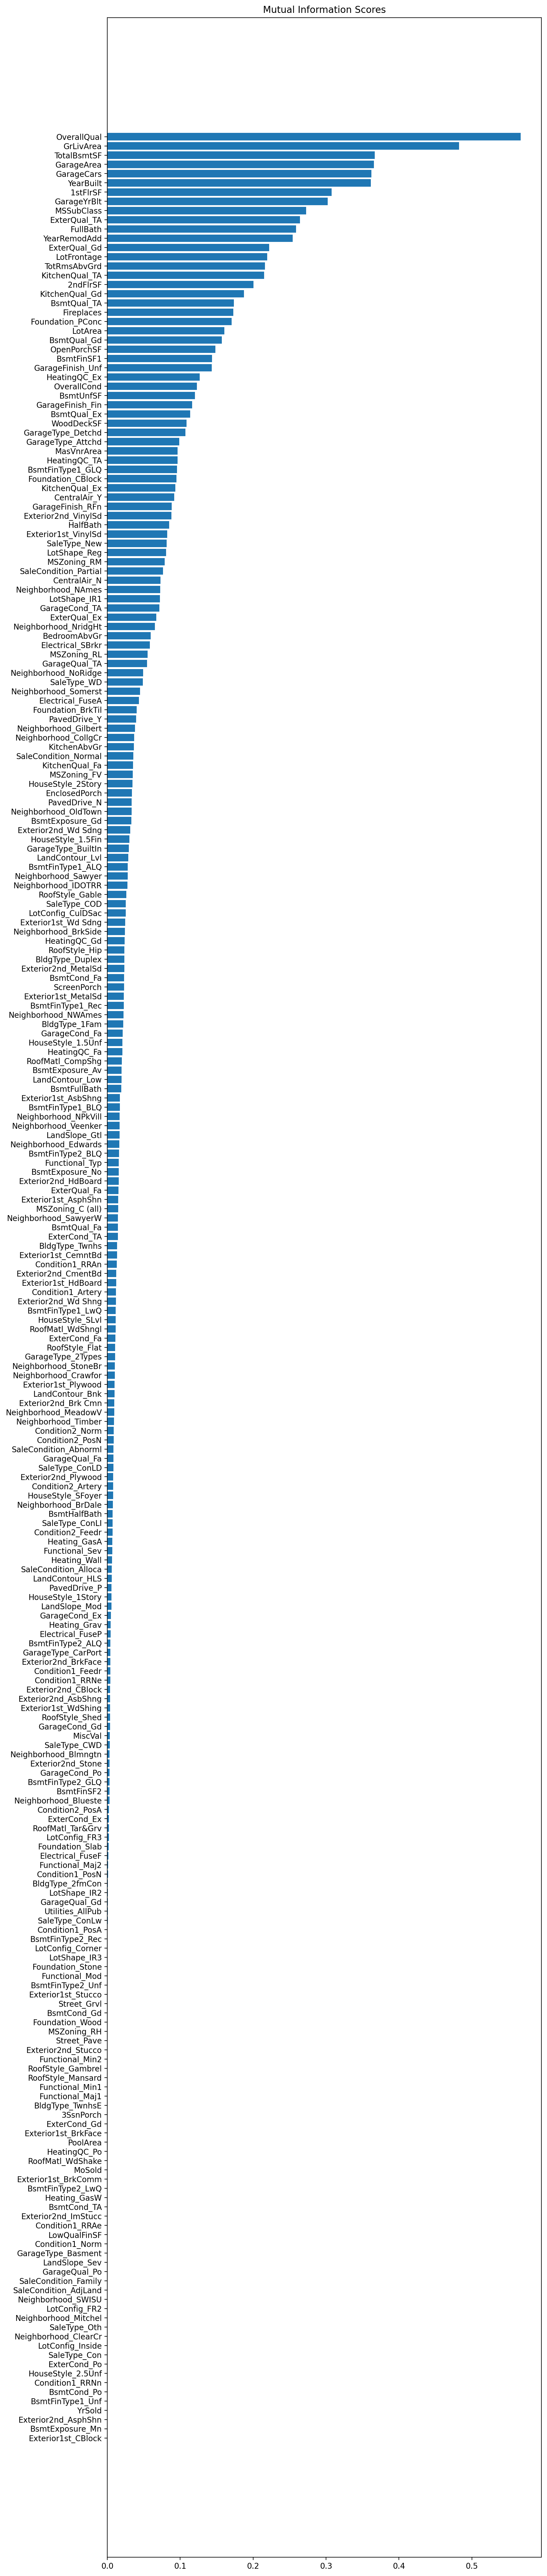

In [8]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=200, figsize=(10, 60))
plot_mi_scores(mi_scores)

### Models

 Compare models efficiency and take the most accurate

In [9]:
#random forest regressor 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)
# pred = model.predict(X_test)
# print(mean_absolute_error(y_test,pred))
model.score(X_test,y_test)

0.8706729397606974

In [10]:
#gradient boosting regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()


gbr.fit(X_train,y_train)
# print(mean_absolute_error(y_test,gbr_pred))
gbr.score(X_test,y_test)

0.8858496034074921

In [11]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)
# ada_pred = ada.predict(X_test)
# print(mean_absolute_error(y_test,ada_pred))
ada.score(X_test,y_test)

0.8092136546352453

### prediction with gradient boosting

In [12]:
#prediction with gradient boosting
predictions = gbr.predict(test)

In [13]:
print(mean_absolute_error(target['SalePrice'],predictions))

54249.57190740486


### kaggle submission file

In [14]:
output = pd.DataFrame({'Id': test_Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

### end result: 0.13804 (Kaggle score)